In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


**Getting the houses prices**

We get the zillow information like cost, number of bathrooms and bedrooms, address and sqft.

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import json


url = 'https://www.zillow.com/miami-springs-fl/'
  
headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'no-cache',
        'cookie': 'zguid=23|%2403435e76-0699-4a32-b86d-77d033c907ef; _ga=GA1.2.1271511001.1575011821; zjs_user_id=null; zjs_anonymous_id=%2203435e76-0699-4a32-b86d-77d033c907ef%22; _gcl_au=1.1.1333357279.1575011822; _pxvid=3cfcc163-1278-11ea-bff8-0242ac12000b; ki_r=; __gads=ID=84d8013cfac6df96:T=1575012041:S=ALNI_MaSvVNZsir2JXJ17pv54bjsPuyfcw; ki_s=199442%3A0.0.0.0.0%3B199444%3A0.0.0.0.2; zgsession=1|c0999376-b167-4a47-a1cd-0e456d882d4e; _gid=GA1.2.55965867.1578668946; JSESSIONID=87D0662A6BC141A73F0D12620788519C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; ki_t=1575011869563%3B1578669044158%3B1578669044158%3B2%3B10; _pxff_tm=1; _px3=2e6809e35ce7e076934ff998c2bdb8140e8b793b53e08a27c5da11f1b4760755:DFItCmrETuS2OQcztcFmt0FYPUn00ihAAue2ynQgbfSq6H+p2yP3Rl3aeyls3Unr1VRJSgcNue8Rr1SUq4P1jA==:1000:9ueZvAJ6v5y4ny7psGF25dK+d3GlytY2Bh+Xj9UUhC4DaioIZ+FMXPU0mOX+Qnghqut0jIT61gLecN4fyu6qXaPDlBX6YsZVbIry1YyBN/37l0Ri3JP+E0h+m+QEBB+bqb6MbE2HtgGBJRJAry8dgOKGM5JtBGdX+X/nuQX1xaw=; AWSALB=E6JYC43gXQRlE2jPT9e2vAQOYPvdHnccBlqi0mcXevYExTaHro0M+uo/Qxahi6JyLz9LpotY9eLtEbYrAOeQXcCm6UhjWnTopQHernmjlR/ibE6JmE8F6tReiBn4; search=6|1581261153229%7Crect%3D40.96202658306895%252C-73.55498286718745%252C40.4487909557045%252C-74.40093013281245%26rid%3D6181%26disp%3Dmap%26mdm%3Dauto%26p%3D3%26z%3D0%26lt%3Dfsbo%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%09%01%096181%09%09%09%090%09US_%09',
        'pragma': 'no-cache',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/75.0.3770.142 Chrome/75.0.3770.142 Safari/537.36'
    }

results = []
string = "Miami, FL"
stringrequest = '{"pagination":{"currentPage":%s},"usersSearchTerm":' + '"{city}"'.format(city = string) + ',"mapBounds":{"west":-80.39282729736325,"east":-80.10924270263669,"south":25.65744642028049,"north":25.887778818590643},"regionSelection":[{"regionId":12700,"regionType":6}],"isMapVisible":true,"filterState":{"isForSaleByAgent":{"value":false},"isForSaleByOwner":{"value":false},"isNewConstruction":{"value":false},"isForSaleForeclosure":{"value":false},"isComingSoon":{"value":false},"isAuction":{"value":false},"isPreMarketForeclosure":{"value":false},"isPreMarketPreForeclosure":{"value":false},"isForRent":{"value":true},"isAllHomes":{"value":true},"isMultiFamily":{"value":false},"isManufactured":{"value":false},"isLotLand":{"value":false}},"isListVisible":true,"mapZoom":12}'
            
for page in range(1, 20):
    params = {
                #'searchQueryState': '{"pagination":{"currentPage":%s},"mapBounds":{"west":-84.69197781640625,"east":-84.26900418359375,"south":33.61815664689875,"north":33.91554940040142},"regionSelection":[{"regionId":37211,"regionType":6}],"isMapVisible":true,"mapZoom":11,"filterState":{"isForSaleByAgent":{"value":false},"isForSaleByOwner":{"value":false},"isNewConstruction":{"value":false},"isForSaleForeclosure":{"value":false},"isComingSoon":{"value":false},"isAuction":{"value":false},"isPreMarketForeclosure":{"value":false},"isPreMarketPreForeclosure":{"value":false},"isForRent":{"value":true}},"isListVisible":true}' % str(page)
                
                 
                 'searchQueryState': stringrequest % str(page)
            
            }
    html = requests.get(url, params=params, headers=headers)
    print(' | Status code: %s' % html.status_code)
    content = BeautifulSoup(html.text, 'lxml')
    cards = content.findAll('article', {'class': 'list-card'})
    for card in cards:
            items = {
                
                'Details': [
                            price.text for price in
                            card.find('ul', {'class': 'list-card-details'}).find_all('li')
                          ],
                'Address': card.find('address', {'class': 'list-card-addr'}).text,              
            }
            
            # try to extract price if not extracted yet
            try:
                items['price'] = card.find('div', {'class': 'list-card-price'}).text
            except:
                pass


            try:
              items['Status'] = card.find('li', {'class': 'list-card-statusText'}).text

            except:
               pass
            
            # append scraped items to results list
            results.append(items)



In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(results)     
print(df.shape) 
df.head() 

**Cleaning data**

We clean Data becouse the numbers of bathrooms, numbers of bedrooms, cost, sqft and adress are contained in a single chain


In [ ]:
#Separate bedrooms, bathdrooms and sqft values
for row in range(df.shape[0]):
  celda = df.loc[row, 'Details']
  df.loc[row, 'Bedroom'] = 0
  df.loc[row, 'Bathroom'] = 0
  df.loc[row, 'SQFTS'] = 0
  for indexcelda in range(len(celda)):
    values = celda[indexcelda].split()
    for index in range(len(values)):     
      if values[index] == 'bd' or values[index] == 'bds':
        try:
         df.loc[row, 'Bedroom'] = float( values[index -1])
        except:
           df.loc[row, 'Bedroom'] = 0
      if values[index] == 'ba' or values[index] == 'bas':
        try:
         df.loc[row, 'Bathroom'] = float(values[index -1])
        except:
          df.loc[row, 'Bathroom'] = 0
      if values[index] == 'sqft' or values[index] == 'sqfts':
        try:
         value = values[index -1].replace(",", "")
         df.loc[row, 'SQFTS'] = float(value)
        except:
           df.loc[row, 'SQFTS'] = 0
        
df.head() 


,Details,Address,price,Status,Bedroom,Bathroom,SQFTS,Cost
0,"[2 bds, 1 ba, 950 sqft, - Apartment for rent]","3100 W Flagler St #ZETM5F1NA, Miami, FL 33135","$1,650+/mo",- Apartment for rent,2.0,1.0,950,1650.0
1,"[$2,538+ 1 bd, $2,952+ 2 bds, $3,631 3 bds]","Modera Edgewater | 455 NE 24th St, Miami, FL","$1,794+ Studio",NaN,3.0,0.0,0,1794.0
2,"[2 bds, 2 ba, 1,654 sqft, - Apartment for rent]","495 Brickell Ave APT 3702, Miami, FL 33131","$5,100/mo",- Apartment for rent,2.0,2.0,1654,5100.0
3,"[$7,600 2 bds]","1451 Brickell Ave, Miami, FL","$4,000 1 bd",NaN,2.0,0.0,0,4000.0
4,"[2 bds, 2 ba, 875 sqft, - Apartment for rent]","1661 NW 17th Ave #19, Miami, FL 33125","$2,020/mo",- Apartment for rent,2.0,2.0,875,2020.0


In [ ]:
#Separate Cost
for row in range(df.shape[0]):
  celda = df.loc[row, 'price']
  df.loc[row, 'Cost'] = 0 
  for indexcelda in range(len(celda)):
    celda = celda.replace("/", " ").replace(",", "").replace("+", "").replace("$", "")
    cost = celda.split()[0]
    try:
      df.loc[row, 'Cost'] = float(cost)
    except:
      df.loc[row, 'Cost'] = 0


df.head()        


,Details,Address,price,Status,Bedroom,Bathroom,SQFTS,Cost
0,"[2 bds, 1 ba, 950 sqft, - Apartment for rent]","3100 W Flagler St #ZETM5F1NA, Miami, FL 33135","$1,650+/mo",- Apartment for rent,2.0,1.0,950,1650.0
1,"[$2,538+ 1 bd, $2,952+ 2 bds, $3,631 3 bds]","Modera Edgewater | 455 NE 24th St, Miami, FL","$1,794+ Studio",NaN,3.0,0.0,0,1794.0
2,"[2 bds, 2 ba, 1,654 sqft, - Apartment for rent]","495 Brickell Ave APT 3702, Miami, FL 33131","$5,100/mo",- Apartment for rent,2.0,2.0,1654,5100.0
3,"[$7,600 2 bds]","1451 Brickell Ave, Miami, FL","$4,000 1 bd",NaN,2.0,0.0,0,4000.0
4,"[2 bds, 2 ba, 875 sqft, - Apartment for rent]","1661 NW 17th Ave #19, Miami, FL 33125","$2,020/mo",- Apartment for rent,2.0,2.0,875,2020.0


In [ ]:
cleanedData = df[(df[['Bathroom', 'Bedroom', 'SQFTS', 'Cost' ]] != 0 ).all(axis = 1)]
cleanedData.reset_index(inplace=True)
cleanedData.head()

,index,Details,Address,price,Status,Bedroom,Bathroom,SQFTS,Cost
0,0,"[2 bds, 1 ba, 950 sqft, - Apartment for rent]","3100 W Flagler St #ZETM5F1NA, Miami, FL 33135","$1,650+/mo",- Apartment for rent,2.0,1.0,950,1650.0
1,2,"[2 bds, 2 ba, 1,654 sqft, - Apartment for rent]","495 Brickell Ave APT 3702, Miami, FL 33131","$5,100/mo",- Apartment for rent,2.0,2.0,1654,5100.0
2,4,"[2 bds, 2 ba, 875 sqft, - Apartment for rent]","1661 NW 17th Ave #19, Miami, FL 33125","$2,020/mo",- Apartment for rent,2.0,2.0,875,2020.0
3,8,"[3 bds, 2 ba, 1,185 sqft, - Apartment for rent]","1661 NW 16th St #8, Miami, FL 33125","$2,350/mo",- Apartment for rent,3.0,2.0,1185,2350.0
4,9,"[1 bd, 1 ba, 720 sqft, - Condo for rent]","2740 SW 28th Ter, Miami, FL 33133","$1,700/mo",- Condo for rent,1.0,1.0,720,1700.0


**To download the venues round the home. we need to get the postal code drom Address column**

Getting Postal code and set longitude and latitude

In [ ]:
def setlgltd(row):
  p = cleanedData.loc[row, 'Address']
  p = p.split()[-1]
  try:
   locator = Nominatim(user_agent="myGeocoder")
   
   location = locator.geocode("Miami, FL {0}".format(p))
   cleanedData.loc[row, 'Latitude'] = location.latitude
   cleanedData.loc[row, 'Longitude'] = location.longitude
  except:
    cleanedData.loc[row, 'Latitude'] = 0
    cleanedData.loc[row, 'Longitude'] = 0
  



In [ ]:
for row in range(cleanedData.shape[0]):
  setlgltd(row)

In [ ]:
cleanedData.head()

,index,Details,Address,price,Status,Bedroom,Bathroom,SQFTS,Cost,Latitude,Longitude
0,0,"[2 bds, 1 ba, 950 sqft, - Apartment for rent]","3100 W Flagler St #ZETM5F1NA, Miami, FL 33135","$1,650+/mo",- Apartment for rent,2.0,1.0,950,1650.0,25.774173,-80.19362
1,2,"[2 bds, 2 ba, 1,654 sqft, - Apartment for rent]","495 Brickell Ave APT 3702, Miami, FL 33131","$5,100/mo",- Apartment for rent,2.0,2.0,1654,5100.0,25.774173,-80.19362
2,4,"[2 bds, 2 ba, 875 sqft, - Apartment for rent]","1661 NW 17th Ave #19, Miami, FL 33125","$2,020/mo",- Apartment for rent,2.0,2.0,875,2020.0,25.774173,-80.19362
3,8,"[3 bds, 2 ba, 1,185 sqft, - Apartment for rent]","1661 NW 16th St #8, Miami, FL 33125","$2,350/mo",- Apartment for rent,3.0,2.0,1185,2350.0,25.774173,-80.19362
4,9,"[1 bd, 1 ba, 720 sqft, - Condo for rent]","2740 SW 28th Ter, Miami, FL 33133","$1,700/mo",- Condo for rent,1.0,1.0,720,1700.0,25.774173,-80.19362


We can check how many latitude and longitude data was gotten

In [ ]:
ltlonggroup = cleanedData.groupby(['Longitude', 'Latitude']).count()
ltlonggroup.reset_index(inplace=True)
ltlonggroup

,Longitude,Latitude,index,Details,Address,price,Status,Bedroom,Bathroom,SQFTS,Cost
0,-80.407556,25.659232,1,1,1,1,1,1,1,1,1
1,-80.360644,25.702210,11,11,11,11,11,11,11,11,11
2,-80.358024,25.734580,2,2,2,2,2,2,2,2,2
3,-80.309174,25.763164,4,4,4,4,4,4,4,4,4
4,-80.304888,25.822941,19,19,19,19,19,19,19,19,19
5,-80.291639,25.776076,16,16,16,16,16,16,16,16,16
6,-80.257979,25.849476,6,6,6,6,6,6,6,6,6
7,-80.233733,25.813212,12,12,12,12,12,12,12,12,12
8,-80.206161,25.851035,4,4,4,4,4,4,4,4,4
9,-80.193620,25.774173,310,310,310,310,310,310,310,310,310


<h2><b>Foursquare</b></h2>
<h4>We use the Foursquare api to get venues round each home</*h4*>

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, Location,  radius=500):
    
    venues_list=[]
    for name, lat, lng, loc in zip(names, latitudes, longitudes, Location):
       
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
   
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            loc,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'House Latitude', 
                  'House Longitude', 
                  'Location',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# type your answer here
Miami_venues = getNearbyVenues(    names=ltlonggroup['Longitude'],
                                   latitudes=ltlonggroup['Latitude'],
                                   longitudes=ltlonggroup['Longitude'],
                                   Location=ltlonggroup['Latitude'] 
                                  )                           
Miami_venues.head()

,Neighborhood,House Latitude,House Longitude,Location,Venue,Venue Latitude,Venue Longitude,Venue Category
0,-80.407556,25.659232,-80.407556,25.659232,Crossings Country Club,25.660120,-80.408676,Park
1,-80.407556,25.659232,-80.407556,25.659232,RC Subs,25.656353,-80.405196,Sandwich Place
2,-80.407556,25.659232,-80.407556,25.659232,Evolution MMA Miami,25.655241,-80.406972,Martial Arts School
3,-80.407556,25.659232,-80.407556,25.659232,Dunkin',25.656327,-80.405036,Donut Shop
4,-80.407556,25.659232,-80.407556,25.659232,Don Criollito,25.656217,-80.407886,Latin American Restaurant


In [ ]:
#I select 4 feasures to concider: restaurant, store, shop, mall, gym, park, bar, bank, Museum
def Clasification(x, row):
  if x.find('Restaurant') > -1:
    Miami_venues.loc[row ,  'Restaurant'] = 1
  else:
    Miami_venues.loc[row ,  'Restaurant'] = 0
  if x.find('Store') > -1:
    Miami_venues.loc[row ,  'Store'] = 1
  else:
    Miami_venues.loc[row ,  'Store'] = 0
  if x.find('Shop') > -1:
    Miami_venues.loc[row ,  'Shop'] = 1
  else:
    Miami_venues.loc[row ,  'Shop'] = 0
  if x.find('Mall') > -1:
    Miami_venues.loc[row ,  'Mall'] = 1
  else:
    Miami_venues.loc[row ,  'Mall'] = 0
  if x.find('Gym') > -1:
    Miami_venues.loc[row ,  'Gym'] = 1
  else:
    Miami_venues.loc[row ,  'Gym'] = 0
  if x.find('Park') > -1:
    Miami_venues.loc[row ,  'Park'] = 1
  else:
    Miami_venues.loc[row ,  'Park'] = 0
  if x.find('Bar') > -1:
    Miami_venues.loc[row ,  'Bar'] = 1
  else:
    Miami_venues.loc[row ,  'Bar'] = 0
  if x.find('Bank') > -1:
    Miami_venues.loc[row ,  'Bank'] = 1
  else:
    Miami_venues.loc[row ,  'Bank'] = 0
  if x.find('Museum') > -1:
    Miami_venues.loc[row ,  'Museum'] = 1
  else:
    Miami_venues.loc[row ,  'Museum'] = 0

In [ ]:
for row in range(Miami_venues.shape[0]):
  palabra = Miami_venues.loc[row, 'Venue Category']
  Clasification(palabra, row)

In [ ]:
Miami_venues
Miami = Miami_venues.groupby('House Latitude').sum()
Miami = Miami.drop(['Neighborhood', 'House Longitude', 'Location', 'Venue Latitude', 'Venue Longitude' ], axis = 1)
Miami.reset_index(inplace=True)
Miami

,House Latitude,Restaurant,Store,Shop,Mall,Gym,Park,Bar,Bank,Museum
0,25.659232,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,25.702210,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.734580,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.763164,7.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.774173,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
5,25.776076,7.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,25.813212,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,25.822941,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,25.849476,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,25.851035,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Finaltable = cleanedData.merge(Miami, left_on='Latitude', right_on='House Latitude', how='inner')


In [ ]:
Finaltable = Finaltable.drop(['index', 'Details','price',  'House Latitude'], axis = 1)

In [ ]:
Finaltable

,Address,Status,Bedroom,Bathroom,SQFTS,Cost,Latitude,Longitude,Restaurant,Store,Shop,Mall,Gym,Park,Bar,Bank,Museum
0,"3100 W Flagler St #ZETM5F1NA, Miami, FL 33135",- Apartment for rent,2.0,1.0,950,1650.0,25.774173,-80.193620,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
1,"495 Brickell Ave APT 3702, Miami, FL 33131",- Apartment for rent,2.0,2.0,1654,5100.0,25.774173,-80.193620,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
2,"1661 NW 17th Ave #19, Miami, FL 33125",- Apartment for rent,2.0,2.0,875,2020.0,25.774173,-80.193620,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
3,"1661 NW 16th St #8, Miami, FL 33125",- Apartment for rent,3.0,2.0,1185,2350.0,25.774173,-80.193620,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
4,"2740 SW 28th Ter, Miami, FL 33133",- Condo for rent,1.0,1.0,720,1700.0,25.774173,-80.193620,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"240 S Royal Poinciana Blvd, Miami Springs, FL ...",- House for sale,4.0,4.0,1727,525000.0,25.822941,-80.304888,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
400,"701 S Royal Poinciana Blvd APT 2, Miami Spring...",- Condo for sale,1.0,1.0,618,199000.0,25.822941,-80.304888,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
401,"1011 La Baron Dr, Miami, FL 33166",- House for sale,5.0,6.0,3787,839000.0,25.822941,-80.304888,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
402,"1022 Hunting Lodge Dr, Miami Springs, FL 33166",- House for sale,6.0,6.0,3475,1650000.0,25.822941,-80.304888,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
Finaltable = Finaltable[['Latitude', 'Longitude', 'Address', 'Status','Bedroom', 'Bathroom', 'SQFTS', 'Cost', 'Restaurant', 'Store', 'Shop', 'Mall', 'Gym', 'Park', 'Bar',  'Bank', 'Museum' ]]
Finaltable

,Latitude,Longitude,Address,Status,Bedroom,Bathroom,SQFTS,Cost,Restaurant,Store,Shop,Mall,Gym,Park,Bar,Bank,Museum
0,25.774173,-80.193620,"3100 W Flagler St #ZETM5F1NA, Miami, FL 33135",- Apartment for rent,2.0,1.0,950,1650.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
1,25.774173,-80.193620,"495 Brickell Ave APT 3702, Miami, FL 33131",- Apartment for rent,2.0,2.0,1654,5100.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
2,25.774173,-80.193620,"1661 NW 17th Ave #19, Miami, FL 33125",- Apartment for rent,2.0,2.0,875,2020.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
3,25.774173,-80.193620,"1661 NW 16th St #8, Miami, FL 33125",- Apartment for rent,3.0,2.0,1185,2350.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
4,25.774173,-80.193620,"2740 SW 28th Ter, Miami, FL 33133",- Condo for rent,1.0,1.0,720,1700.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,25.822941,-80.304888,"240 S Royal Poinciana Blvd, Miami Springs, FL ...",- House for sale,4.0,4.0,1727,525000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
400,25.822941,-80.304888,"701 S Royal Poinciana Blvd APT 2, Miami Spring...",- Condo for sale,1.0,1.0,618,199000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
401,25.822941,-80.304888,"1011 La Baron Dr, Miami, FL 33166",- House for sale,5.0,6.0,3787,839000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
402,25.822941,-80.304888,"1022 Hunting Lodge Dr, Miami Springs, FL 33166",- House for sale,6.0,6.0,3475,1650000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
for row in range(Finaltable.shape[0]):
  p = Finaltable.loc[row, 'Status']
  p = p.split()[-1]
  Finaltable.loc[row, 'Status'] = p

Finaltable

,Latitude,Longitude,Address,Status,Bedroom,Bathroom,SQFTS,Cost,Restaurant,Store,Shop,Mall,Gym,Park,Bar,Bank,Museum
0,25.774173,-80.193620,"3100 W Flagler St #ZETM5F1NA, Miami, FL 33135",rent,2.0,1.0,950,1650.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
1,25.774173,-80.193620,"495 Brickell Ave APT 3702, Miami, FL 33131",rent,2.0,2.0,1654,5100.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
2,25.774173,-80.193620,"1661 NW 17th Ave #19, Miami, FL 33125",rent,2.0,2.0,875,2020.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
3,25.774173,-80.193620,"1661 NW 16th St #8, Miami, FL 33125",rent,3.0,2.0,1185,2350.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
4,25.774173,-80.193620,"2740 SW 28th Ter, Miami, FL 33133",rent,1.0,1.0,720,1700.0,15.0,2.0,4.0,0.0,1.0,0.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,25.822941,-80.304888,"240 S Royal Poinciana Blvd, Miami Springs, FL ...",sale,4.0,4.0,1727,525000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
400,25.822941,-80.304888,"701 S Royal Poinciana Blvd APT 2, Miami Spring...",sale,1.0,1.0,618,199000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
401,25.822941,-80.304888,"1011 La Baron Dr, Miami, FL 33166",sale,5.0,6.0,3787,839000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
402,25.822941,-80.304888,"1022 Hunting Lodge Dr, Miami Springs, FL 33166",sale,6.0,6.0,3475,1650000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
Finaltable.dtypes
Finaltable['SQFTS'] = list(map(lambda x: float(x), Finaltable['SQFTS']))

In [ ]:
rentTable = Finaltable[Finaltable.Status == 'rent']
saleTable = Finaltable[Finaltable.Status == 'sale']

**K-Means**

We use the Kmeans to determine the clusters. 

**Sales**

In [ ]:

X = saleTable.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
#clusterNum = 4
#k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
#k_means.fit(X)
#labels = k_means.labels_

In [ ]:
Wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(X)
  Wcss.append(kmeans.inertia_)

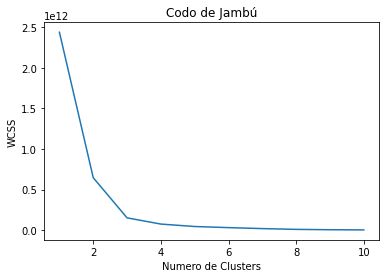

In [ ]:
plt.plot(range(1,11), Wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
saleTable["Clasification"] = labels

In [ ]:
ClasificationTable = saleTable.iloc[:,4: ]
ClasificationTable["Clasification"] = labels
ClasificationTable.groupby('Clasification').mean()

,Bedroom,Bathroom,SQFTS,Cost,Restaurant,Store,Shop,Mall,Gym,Park,Bar,Bank,Museum
Clasification,,,,,,,,,,,,,
0,4.000,3.111111,2377.666667,7.351111e+05,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2.375,1.750000,1165.625000,3.933375e+05,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,5.500,6.000000,4429.500000,1.575000e+06,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Rent**

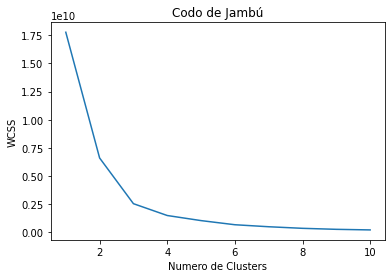

In [ ]:
X = rentTable.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(X)
  Wcss.append(kmeans.inertia_)
plt.plot(range(1,11), Wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('Mean distance of data points to cluster centroit')
plt.show()

In [ ]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
rentTable["Clasification"] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
ClasificationTable = rentTable.iloc[:,4: ]
ClasificationTable.groupby('Clasification').mean()

,Bedroom,Bathroom,SQFTS,Cost,Restaurant,Store,Shop,Mall,Gym,Park,Bar,Bank,Museum
Clasification,,,,,,,,,,,,,
0,1.811966,1.488604,1106.356125,2071.860399,12.846154,2.042735,3.475783,0.0,0.840456,0.002849,3.156695,0.834758,0.789174
1,3.800000,4.600000,4440.600000,30000.000000,15.000000,2.000000,4.000000,0.0,1.000000,0.000000,4.000000,1.000000,1.000000
2,5.000000,5.500000,4879.000000,90000.000000,15.000000,2.000000,4.000000,0.0,1.000000,0.000000,4.000000,1.000000,1.000000
3,3.703704,3.611111,2508.185185,11351.481481,14.629630,2.000000,3.925926,0.0,1.000000,0.000000,3.851852,0.962963,0.962963
4,5.000000,5.500000,6553.000000,60000.000000,15.000000,2.000000,4.000000,0.0,1.000000,0.000000,4.000000,1.000000,1.000000


In [ ]:
rentTable.shape

(385, 18)

In [ ]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[25.7751, -80.2105], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rentTable['Latitude'], rentTable['Longitude'], rentTable['Address'], rentTable['Clasification']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters